In [1]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 2. Dataset Loading
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("HousePrice")], axis=1)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# 3. Feature and Target Separation
X = df.drop("HousePrice", axis=1)
y = df["HousePrice"]

In [4]:
# 4. Train-Test Split and Feature Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 5. Model Definition
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [6]:
# 6. Model Training and Evaluation
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2
Linear Regression,0.533200,0.745581,0.575788
Ridge Regression,0.533193,0.745557,0.575816
Decision Tree,0.522259,0.724234,0.599732
Random Forest,0.327425,0.505143,0.805275


Best Model: Random Forest


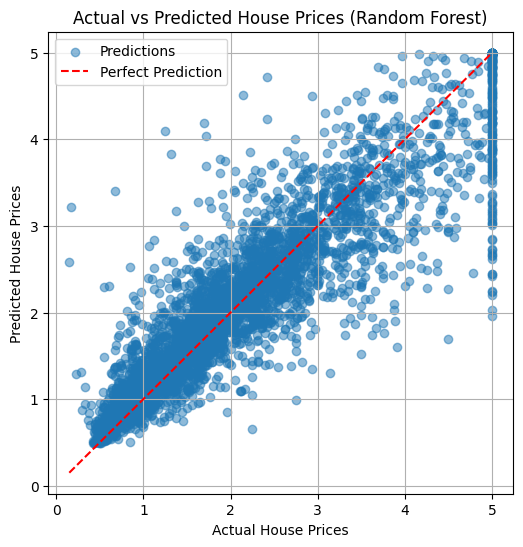

In [7]:
# 7. Best Model Seleciont and Visualization
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print("Best Model:", best_model_name)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red", label="Perfect Prediction")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title(f"Actual vs Predicted House Prices ({best_model_name})")
plt.legend()
plt.grid(True)
plt.show()
